## Problem 1

In [198]:
import numpy as np
data = np.array([4, 5, 5, 6, 12, 14, 15, 15, 16, 17])

def w(xs):
    return np.array([.5 if abs(x) < 1 else 0 for x in xs])

def estimate(x):
    N, h = len(data), 4
    lst = w((x - data) / h)
    return (1 / (N * h)) * lst.sum()

print(estimate(3))
print(estimate(10))
print(estimate(15))

0.05
0.0125
0.07500000000000001


## Problem 2

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import pandas as pd
from sklearn import metrics

In [200]:
class KMeans():
    def __init__(self, data, centers):
        self.data = data
        self.centers = centers
        self.assignments = self.assign()
        
    def update_centers(self):
        for i, c in enumerate(self.centers):
            if (self.assignments == i).sum() != 0:
                self.centers[i] = self.data[self.assignments == i].mean(axis=0) 

    def assign(self):
        distances = distance.cdist(self.data, self.centers)
        return distances.argmin(axis=1)

    def train(self, iterations=0):
        if iterations >= 5000: return
        self.update_centers()
        new_assignments = self.assign()
        if not (new_assignments == self.assignments).all():
            self.assignments = new_assignments
            self.train(iterations+1)
        else:
            return

In [201]:
data = np.concatenate([np.random.multivariate_normal(np.random.uniform(-4, 4, 2), np.random.randn(2,2), 50), 
                       np.random.multivariate_normal(np.random.uniform(-8, 8, 2), np.random.randn(2,2), 50), 
                       np.random.multivariate_normal(np.random.uniform(-2, 2, 2), np.random.randn(2,2), 50)])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


In [202]:
centers = np.random.uniform(-8, 8, (3, 2))

In [203]:
colors = np.array(["b", "g", "r", "c", "m","y", "k", "w"])

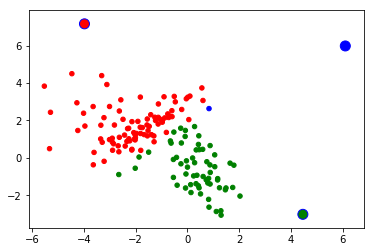

In [204]:
model = KMeans(data, centers)
fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1], c=colors[model.assign()], s=20)
ax.scatter(centers[:,0], centers[:,1], c=colors[[0,1,2]], s=100, edgecolors='b')

In [205]:
model.train()

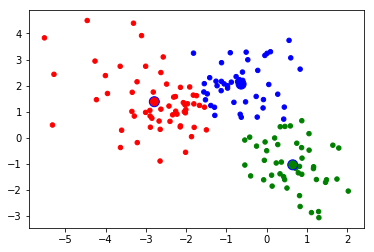

In [206]:
fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1], c=colors[model.assign()], s=20)
ax.scatter(centers[:,0], centers[:,1], c=colors[[0,1,2]], s=100, edgecolors='b')

In [207]:
import numpy as np
from scipy.misc import comb

## From https://stackoverflow.com/questions/49586742/rand-index-function-clustering-performance-evaluation
def rand_index_score(classes, clusters):
    tp_plus_fp = comb(np.bincount(clusters), 2).sum()
    tp_plus_fn = comb(np.bincount(classes), 2).sum()
    A = np.c_[(clusters, classes)]
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(clusters))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

In [208]:
df = pd.read_csv('./Data_Cortex_Nuclear.csv')
labels = df[df.columns[-1]].values
classes = {label: i for i, label in enumerate(set(labels))}
labels = [classes[label] for label in labels]
len(classes)

8

In [209]:
df = df[df.columns[1:-4]]
df = df.fillna(df.mean())

In [210]:
data = df.values

In [211]:
info = {}

for k in range(2,11):
    info[k] = {}
    indices = np.random.randint(0,data.shape[0],k)
    centers = data[indices]
    model = KMeans(data, centers)
    model.train()
    info[k]['RAND'] = rand_index_score(labels, model.assignments)
    info[k]['ADJUSTED RAND'] = metrics.adjusted_rand_score(labels, model.assignments)
    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  del sys.path[0]


In [212]:
df = pd.DataFrame(info)
df

,2,3,4,5,6,7,8,9,10
ADJUSTED RAND,0.014248,0.069018,0.075373,0.081785,0.095542,0.113149,0.145597,0.138232,0.166658
RAND,0.507181,0.639780,0.699339,0.709285,0.761849,0.786153,0.807661,0.811590,0.825758


Based on Rand and Adjusted Rand, 10 clusters performs best